# Imports

In [113]:
from sklearn import datasets

import numpy as np      # 배열
import pandas as pd     # 데이터 프레임
import matplotlib.pyplot as plt # 그래프
import seaborn as sns           # 그래프

from sklearn.neighbors import KNeighborsClassifier 
# sklearn(scikin-learn) = 모듈을 저장하고 있는 패키지
# camel 표기법 : 클래스
# sklearn 패키지에서 저장하고 있는 neighbor 모듈에서 KNeighborsClassifier 클래스를 import

from sklearn.model_selection import train_test_split
# sklearn 패키지에서 저장하고 있는 model_selection 모듈에서 train_test_split 함수를 import
# snake 표기법 : 변수 or 함수

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# sklearn 패키지에서 저장하고 있는 preprocessing 모듈에서 StandardScaler, MinMaxScaler 클래스를 import

# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 회귀의 평가지표들.

# 데이터 셋 준비

In [114]:
iris = datasets.load_iris()
# sklearn.utils.Bunch - Python의 dict와 비슷 (Key: value)

In [115]:
type(iris) 
# data: 1차원 배열을 원소로 갖는 2차원 배열

sklearn.utils.Bunch

In [116]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [117]:
X = iris['data'] # 2차원 특성배열
y = iris['target'] # 1차원 타겟배열

In [118]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [119]:
y[:5]

array([0, 0, 0, 0, 0])

In [120]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 데이터 셋(X,y)를 split

In [121]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, 
                                          test_size = 0.3, # test_set의 비율을 30%로.
                                          random_state=1,
                                          stratify = y) # 

In [122]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((105, 4), (45, 4), (105,), (45,))

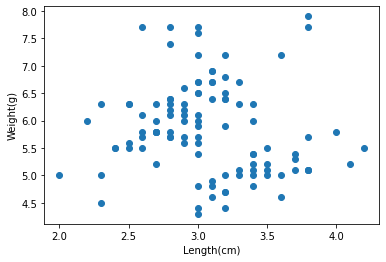

In [123]:
# 훈련 셋 시각화
plt.scatter(X_tr[:,1], X_tr[:,0])


plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')

plt.show()

# Standard Scaler를 이용한 특성 스케일 변환

In [124]:
std_scaler = StandardScaler() # 표준화 스케일러

In [125]:
std_scaler.fit(X_tr)

StandardScaler()

In [126]:
print(std_scaler.mean_) # 훈련 셋의 특성들의 평균
print(np.mean(X_tr, axis=0))
print(std_scaler.var_) # 훈련 셋의 특성들의 분산
print(np.var(X_tr, axis=0))

[5.85714286 3.06952381 3.78952381 1.19714286]
[5.85714286 3.06952381 3.78952381 1.19714286]
[0.6894966  0.18459501 3.21484263 0.58180136]
[0.6894966  0.18459501 3.21484263 0.58180136]


In [127]:
X_tr_scaled = std_scaler.transform(X_tr) # 훈련 셋을 표준화 스케일링 수행.
print(X_tr_scaled[:5])

# 테스트 셋을 스케일 변환
X_te_scaled = std_scaler.transform(X_te)
print(X_te_scaled)

[[-0.4301064   2.63118533 -1.33269725 -1.30728421]
 [-0.55053619  0.76918392 -1.16537974 -1.30728421]
 [ 0.65376173  0.30368356  0.84243039  1.44587881]
 [ 1.0150511   0.53643374  1.0655204   1.18367281]
 [-1.03225536  0.30368356 -1.44424226 -1.30728421]]
[[ 0.41290214  0.76918392  0.89820289  1.44587881]
 [-0.55053619  1.9329348  -1.16537974 -1.04507821]
 [-1.51397453  0.76918392 -1.33269725 -1.17618121]
 [-1.15268515 -1.32556767  0.39625036  0.65926081]
 [ 0.89462131 -0.16181679  0.34047786  0.2659518 ]
 [ 0.29247235 -0.62731714  0.11738784  0.1348488 ]
 [ 1.0150511  -1.32556767  1.12129291  0.79036381]
 [ 0.41290214 -2.02381821  0.39625036  0.3970548 ]
 [ 0.65376173 -0.86006732  0.84243039  0.92146681]
 [-0.55053619  1.9329348  -1.38846976 -1.04507821]
 [-0.18924682  3.09668569 -1.27692475 -1.04507821]
 [ 0.29247235 -0.16181679  0.61934037  0.79036381]
 [-1.75483411 -0.39456697 -1.33269725 -1.30728421]
 [-1.15268515 -1.55831785 -0.27301968 -0.2584602 ]
 [-1.51397453  0.30368356 -1.3

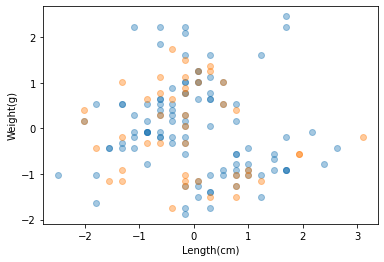

In [142]:
# 스케일이 변환된 훈련 셋 시각화
plt.scatter(X_tr_scaled[:,1], X_tr_scaled[:,0], label='Train', alpha=0.4)
plt.scatter(X_te_scaled[:,1], X_te_scaled[:,0], label='Train', alpha=0.4)

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')

plt.show()

# KNN 모델 생성 / 훈련 / 평가

* 평가 1 : 훈련 셋
* 평가 2 : 테스트 셋
* 평가지표 출력 (confusion_matrix, classification_report, f1_socre)

In [129]:
knn_clf = KNeighborsClassifier() # ML 모델 생성

In [130]:
knn_clf.fit(X_tr_scaled, y_tr) # ML 모델을 스케일링된 훈련 셋으로 훈련

KNeighborsClassifier()

In [131]:
# 훈련 셋에서의 정확도
knn_clf.score(X_tr_scaled, y_tr)

0.9619047619047619

In [132]:
# 테스트 셋에서의 정확도
knn_clf.score(X_te_scaled, y_te)

0.9333333333333333

In [133]:
# 훈련셋의 예측값
y_tr_pred = knn_clf.predict(X_tr)
y_tr_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [134]:
# 훈련셋의 실제값
y_tr

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [135]:
# 테스트셋의 예측값
y_te_pred = knn_clf.predict(X_te)
y_te_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [136]:
# 테스트셋의 실제값
y_te

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [137]:
# 훈련 셋 평가 지표들
print('MAE:', mean_absolute_error(y_tr, y_tr_pred))
print('MSE:', mean_squared_error(y_tr, y_tr_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
print('R2 score:', r2_score(y_tr, y_tr_pred))

MAE: 1.0
MSE: 1.6666666666666667
RMSE : 1.2909944487358056
R2 score: -1.5


In [138]:
# 테스트 셋 평가 지표들
print('MAE:', mean_absolute_error(y_te, y_te_pred))
print('MSE:', mean_squared_error(y_te, y_te_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_te, y_te_pred)))
print('R2 score:', r2_score(y_te, y_te_pred))

MAE: 1.0
MSE: 1.6666666666666667
RMSE : 1.2909944487358056
R2 score: -1.5


# k값을 변화에 따른 정확도 변화

In [139]:
# 예측값을 구하지 않고 정확도를 구하는 방법

k_values = np.arange(1, 106)  # [1, 2, 3, ..., 48, 49]
accuracies = []  # 각 k값에서 계산한 정확도를 저장할 리스트
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # ML 모델 생성
    knn.fit(X, y)  # ML 모델 훈련
    # pred = knn.predict(X)  # 훈련 데이터의 예측값
    # acc = np.mean(y == pred)  # 정확도
    acc = knn.score(X, y)  # 정확도
    accuracies.append(acc)  # 계산된 정확도를 리스트에 추가

print(accuracies)

[1.0, 0.98, 0.96, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.9533333333333334, 0.96, 0.9533333333333334, 0.96, 0.96, 0.96, 0.9533333333333334, 0.96, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9466666666666667, 0.96, 0.94, 0.9533333333333334, 0.9333333333333333, 0.9466666666666667, 0.94, 0.94, 0.9333333333333333, 0.94, 0.94, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9266666666666666, 0.9333333333333333, 0.92, 0.9266666666666666, 0.9133333333333333, 0.9266666666666666, 0.9, 0.9133333333333333, 0.9066666666666666, 0.9066666666666666, 0

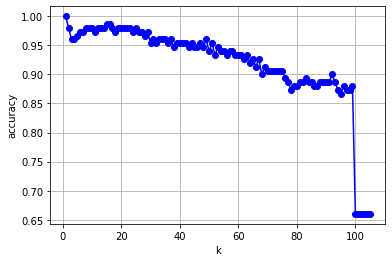

In [140]:
plt.plot(k_values, accuracies, 'bo-')
plt.grid()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()